## 1. Linear Regression

### 공부 시간에 따른 시험 점수

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [6]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [7]:
X = dataset.iloc[:,:-1].values #처음부터 마지막 컬럼 직전까지의 데이터 (독립 변수 - 원인
Y = dataset.iloc[:,-1].values # 마지막 컬럼 데이터 (종속 변수 - 결과)

In [8]:
X,Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # 객체 생성
reg.fit(X,Y) # 학습 (모델 생성)

LinearRegression()

In [10]:
Y_pred = reg.predict(X) # X에대한 예측 값
Y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

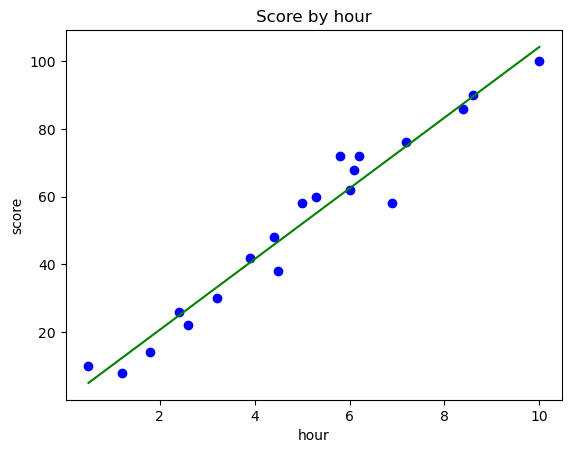

In [21]:
plt.scatter(X,Y,color='blue') #산정도
plt.plot(X,Y_pred,color='green') # 선 그래프
plt.title('Score by hour')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()

In [22]:
print('9시간 공부 했을 때 예상 점수 : ',reg.predict([[9]]))

9시간 공부 했을 때 예상 점수 :  [93.77478776]


In [25]:
m = reg.coef_ # 기울기 (m)

In [26]:
b = reg.intercept_ # y절편 (b)

In [27]:
print(m*9+b) # y = mx + b

[93.77478776]
